给定一个语法，如何生成语法？

语法示例1（numbers()）

In [108]:
two_numbers = '''
2_nums => num | num
num* => num num* | num
num => 0 | 1 | 2 | 3 | 4 |

'''

In [109]:
import random
def two_nums():return num() + num()

def num():
    return random.choice("0 | 1 | 2 | 3 | 4 |".split("|"))
def numbers():
    if random.random()<0.5:
        return num()
    else:
        return num()+numbers()
num()

' 1 '

In [111]:
two_nums()

'0  3 '

In [112]:
for i in range(10):
    print(numbers())

0 
 2 
 2  4  4 
 1 
 4 

 2 
 4 
 2 
 2 


语法示例1思考？

1.语法可以通过定义简单的函数去实现

2.可以通过递归来生成更复杂的文字（递归）









语法示例2

In [113]:
simple_grammer="""
sentence=>noun_phrase + verb_phrase
noun_phrase=>Article + adj* + noun
adj*=> null | adj + adj*
verb_phrase=>verb + noun_phrase
Article=> 一个 | 这个 | 那个 
noun=> 女人 | 桌子 | 汽车 | 小狗 | 小强
Adj=> 漂亮的 | 好看的 | 蓝色的 | 可爱的 | 新的
Verb=> 看着 | 听着 | 吃着 | 喝着 | 趴着 
"""

In [116]:
def adj(): return random.choice('漂亮的 | 好看的 | 蓝色的 | 可爱的 | 新的'.split('|')).split()[0]
def adj_star():
    return random.choice([lambda:" ",lambda:adj()+adj_star()])()
for i in range(10):
    print(adj_star())

 
新的 
 
 
蓝色的 
新的 
蓝色的 
 
新的 
 


In [117]:
def Article():return random.choice('一个 | 这个 | 那个'.split('|')).split()[0]
Article()
def verb():return random.choice('看着 | 听着 | 吃着 | 喝着 | 趴着'.split('|')).split()[0]
def noun():return random.choice('女人 | 桌子 | 汽车 | 小狗 | 小强'.split('|')).split()[0]
def noun_phrase():return Article() + adj_star() + noun()
def verb_phrase():return verb() + noun_phrase()
def sentence():return noun_phrase() + verb_phrase()
for i in range(10):
    print(sentence())

那个漂亮的 小狗喝着一个 桌子
那个 汽车听着这个 汽车
一个可爱的 汽车喝着这个 汽车
那个 小强喝着一个可爱的可爱的新的漂亮的 小强
一个新的新的好看的漂亮的 汽车趴着这个 小强
那个 汽车听着那个蓝色的 桌子
这个蓝色的好看的 汽车喝着一个蓝色的 桌子
那个 小狗趴着这个好看的 小强
那个新的 小强看着这个新的新的蓝色的可爱的新的 小狗
一个蓝色的漂亮的 桌子听着这个蓝色的 小狗


语法示例2思考？

But the question is???

如果更换了语法，所有的程序必须重新写，问题的输入会影响函数本身，得再重新定义函数。

解决？？


In [118]:
two_numbers='''
two => num + num | num - num


num => 0 | 1 | 2 | 3 | 4 | 5
'''

In [119]:
def generate_grammar(grammar_str:str,target,split="=>"):
    grammar={}
    for line in grammar_str.split("\n"):
        if not line:continue
        express,formula=line.split(split)
        formulas=formula.split("|")
        formulas=[f.split() for f in formulas]
        grammar[express.strip()]=formulas
        print(express,":",formulas)
    return grammar
generate_grammar=generate_grammar(two_numbers,target='two')


two  : [['num', '+', 'num'], ['num', '-', 'num']]
num  : [['0'], ['1'], ['2'], ['3'], ['4'], ['5']]


In [120]:
generate_grammar

{'two': [['num', '+', 'num'], ['num', '-', 'num']],
 'num': [['0'], ['1'], ['2'], ['3'], ['4'], ['5']]}

现在，将刚开始的字符串two_numbers的输入转化位了一个dict，即grammer（仅输入格式变了str—>dict）

现在，需要提取dict中的表达式

In [121]:
def generater_by_grammar(grammar:dict,target:str):
    if target not in grammar: return target
#     the above is to test if target is a key.
    expr=random.choice(grammar[target])
    return "".join(generater_by_grammar(grammar,t) for t in expr)
    

In [122]:
for formula in range(10):
    print(generater_by_grammar(generate_grammar,"two"))

2-2
1-4
4+5
5-5
2-2
4+3
0-2
1-4
5+5
3+4


上述代码整理到一块示下

In [123]:
numbers_ops='''
expression=> num_op | num_op expression
num_op=> num op num
op=> + | - | * | /


num => 0 | 1 | 2 | 3 | 4 | 5
'''
def generate_grammar(grammar_str:str,target,split="=>"):
    grammar={}
    for line in grammar_str.split("\n"):
        if not line:continue
        express,formula=line.split(split)
        formulas=formula.split("|")
        formulas=[f.split() for f in formulas]
        grammar[express.strip()]=formulas
    return grammar
def generater_by_grammar(grammar:dict,target:str):
    if target not in grammar: return target
#     the above is to test if target is a key.
    expr=random.choice(grammar[target])
    return "".join(generater_by_grammar(grammar,t) for t in expr)
def generater_gramar_by_str(grammar_str,split,target):
    grammar=generate_grammar(grammar_str,target,split)
    return generater_by_grammar(grammar,target)

for formula in range(10):
    print(generater_gramar_by_str(numbers_ops,"=>","expression"))


3-33*33/1
4*50/4
5-42-3
4+0
2-4
2*33+22*2
2*34/31*22-45*44/43+22+0
1/4
4/55+12/1
0-50+2


上述那样做的原因是：问题输入改变，程序无序重新再写

如下

In [124]:
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""
for formula in range(10):
    print(generater_gramar_by_str(human,"=","human"))

我找找玩的
我想找点玩的
我们想找点玩的
我们找找玩的
俺找找玩的
我找找玩的
我找找乐子
我们找找乐子
我想找点玩的
俺找找乐子


又如

In [127]:
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [45]:
for formula in range(10):
    print(generater_gramar_by_str(host,"=","host"))

你好我是494号,您需要null喝酒吗？
先生,您好我是3号,请问你要null喝酒吗？
先生,你好我是3号,请问你要null打猎吗？
小朋友,您好我是8号,请问你要null赌博吗？
女士,你好我是4号,请问你要null打牌吗？
你好我是475号,您需要null赌博吗？
女士,你好我是8号,您需要null赌博吗？
您好我是1361号,您需要null喝酒吗？
你好我是296号,请问你要null赌博吗？
先生,你好我是62号,您需要null打猎吗？


规则引擎：输入的格式有一定的规则可言？

自己想的例子

In [46]:
league="""
league = 英雄 技能 是不是 大招
英雄 = 轮子妈 | 盖伦 | 皇子 | 盲僧
技能 = Q技能 | W技能 | E技能 | R技能
是不是 = 肯定是 | 不可能是 | 绝对是 | 应该是
大招 = 神龙摆尾 | 天崩地裂 | 德玛西亚正义 | 狩猎


"""
for formula in range(10):
    print(generater_gramar_by_str(league,"=","league"))

皇子Q技能不可能是狩猎
盲僧W技能不可能是德玛西亚正义
盖伦W技能不可能是神龙摆尾
盲僧Q技能不可能是神龙摆尾
盖伦R技能肯定是德玛西亚正义
盲僧R技能不可能是德玛西亚正义
盲僧Q技能应该是天崩地裂
轮子妈E技能绝对是天崩地裂
盲僧R技能绝对是天崩地裂
盲僧Q技能绝对是狩猎


# Date Driven

目标是输入数据变化，程序不必改变

AI？如何能自动化解决问题？找到一个方法：输入改变，使用的方法不变（规则引擎—>输入数据的高度抽象）

In [47]:
simpel_programming = '''
programming => if_stmt | assign | while_loop
while_loop => while ( cond ) { change_line stmt change_line }
if_stmt => if ( cond )  { change_line stmt change_line } | if ( cond )  { change_line stmt change_line } else { change_line stmt change_line } 
change_line => /N
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  var _ num | words 
words => words _ word | word 
word => name | info |  student | lib | database 
nums => nums num | num
num => 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 0
'''

In [71]:
# print(generater_gramar_by_str(simpel_programming,"=>","programming"))
lines=generater_gramar_by_str(simpel_programming,"=>","programming")
print(lines)
line=lines.split("/N")
print(line)
code_lines=[]
for i,sen in enumerate(line):
    if 1 < len(lines) < 2:
        code_lines.append(i * " " + sen)
    else:
        code_lines.append((len(lines)-i) * " " + sen)
print(code_lines)

while(infoname){/Nstudent_info_name_info=database/N}
['while(infoname){', 'student_info_name_info=database', '}']
['                                                    while(infoname){', '                                                   student_info_name_info=database', '                                                  }']


In [72]:
def pretty_print(line):
    lines=line.split("/N")
    code_lines=[]
    
    for i,sen in enumerate(lines):
        if 1 < len(lines) < 2:
            code_lines.append(i * " " + sen)
        else:
            code_lines.append((len(lines)-i) * " " + sen)
    return code_lines

In [73]:
generated_programming=[]
for i in range(20):
    generated_programming+=pretty_print(generater_gramar_by_str(simpel_programming,"=>","programming"))

In [74]:
for line in generated_programming:
    print(line)

   if(student_name_lib>=name_lib_name_8_6){
  database_lib_1_8=name
 }
 name=lib_0_1_4_7
     while(namestudent_database_3){
    if(info_database_student_1_6<name_student_lib_student_info_0_7){
   student_database_name_lib_8=name_database_database_0
  }
 }
   if(student==database){
  lib_student_9_1_8=student_3
 }
     while(info<=name_info_student_student_5_1){
    if(info_6_7<=name_name_name_database_database_lib_lib_name_1){
   info_info_database_database_9=name_name_student_7
  }
 }
 student_4=info_student_lib_lib_6
             if(info_namedatabase_student_student_student){
            if(lib_5_4>=student_4){
           info=info
          }else{
         database=database_database
        }
       }else{
      if(student_database_database==info_lib){
     lib_name_student_3_1=database_4
    }else{
   student_info=database_lib_9
  }
 }
       if(student_info>=info_name_info){
      if(database==info){
     student_6_2_7_7_2_4_3=database
    }else{
   name_9_6=name
  }
 }
     if(i

# Language model

how to get Pr(w1|w2w3w4)?

In [3]:
import random
random.choice(range(100))

63

In [4]:
filename="/Users/56583/Desktop/NLP/sqlResult_1558435.csv"
import pandas as pd
content=pd.read_csv(filename,encoding='gb18030')
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [5]:
articles=content["content"].tolist()
print(articles[110])
len(articles)

在外国名著《麦田里的守望者》中，作者想要守护麦田里如自己内心一般纯真的孩子们。而驻村干部们，也在这个炎热的夏天里撸袖子上阵，真正做起了村民们的“麦田守望者”。
三夏时节不等人
你看到了吗？不停翻涌起伏、仿若铺陈至天边的金黄麦浪中，那若隐若现的人影，是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者。
在这个炎热的夏季，他们深入田间地头，帮助村民们收割小麦。扛起收麦机，麦田中的每个人都显得兴致勃勃，一天下来就近22亩小麦收割完毕。
志愿者麦麦提亚森擦去满脸的汗水，高兴地告诉驻村队员：“我们青年志愿者应该多做贡献，为村里的脱贫致富出把力。工作队带着我们为村里的老人服务，看到那些像我爷爷奶奶一样的老人赞许感谢的目光，我体会到了帮助他人的快乐。”（自治区新闻出版广电局驻村工作队孙敏 艾力依布拉音）
麦收时节 我们在一起
6月中旬的和田墨玉，麦田金黄，静待收割。
6月14日、15日两天，自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道，帮助村里29户有需要的村民进行小麦收割工作。
田间地头，罕勒克艾日克村志愿队的红旗迎风飘扬，格外醒目。10余台割麦机一起轰鸣，男人们在用机器收割小麦的同时，几名妇女也加入到志愿队，构成了一道美丽的麦收风景。
休息空闲，工作队员和村民们坐在树荫下、田埂上，互相问好、聊天。语言交流有困难，就用手势、动作比划着聊天，有趣地交流方式不时引来阵阵欢笑。大家在一同享受丰收和喜悦，也一同增进着彼此的情感和友谊。（自治区高级人民法院驻村工作队周春梅 艾地艾木·阿不拉）
细看稻菽千重浪
6月15日，自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村，见到了自己的亲戚。现场处处都透出掩盖不住的喜悦，一声声亲切的“谢谢”、一个个结实的拥抱，都透露出浓浓的亲情。
没坐一会儿，在嘘寒问暖中大家了解到在麦收的关键时刻，部分村民家中却存在收割难的问题。小麦成熟期短，收获的时间集中，天气的变化对小麦最终产量的影响极大，如果不能及时收割，会有不小损失的。于是，大家几乎立刻就决定要帮助亲戚们收割麦子。
在茂密的麦地里，干部们每人手持一把镰刀，一字排开，挽起衣袖、卷起裤腿，挥舞着镰刀进行着无声的竞赛。
骄阳似火，汗如雨下，但这都挡不住大家的热情。随着此起彼伏的镰刀割倒麦

89611

In [6]:
import jieba
import re

In [7]:
def token(string):
    return re.findall("\w",string)

\w匹配字母或数字或下划线或汉字

In [8]:
from collections import Counter
with_jieba_cut=Counter(jieba.cut(articles[110]))
with_jieba_cut.most_common()[:10]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\56583\AppData\Local\Temp\jieba.cache
Loading model cost 0.642 seconds.
Prefix dict has been built successfully.


[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [9]:
"".join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [10]:
articles_clean=["".join(token(str(a)))for a in articles]
articles_clean[1:3]

['骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台',
 '此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可能与刘作虎所说一加手机5要做市面最轻薄大屏旗舰的设定有关按照目前掌握的资料一加手机5拥有55寸1080P三星AMOLED显示屏6G8GBRAM64GB128GBROM双1600万摄像头备货量惊喜根据京东泄露的信息一加5起售价是xx99元应该是在279928992999中的某个']

articles_clean是一个list（含有所有content信息的list）

In [11]:
len(articles_clean)

89611

In [12]:
with open(r"C:\Users\56583\Desktop\articles_date.txt","w") as f:
    for a in articles_clean:
        f.write(a + "\n")

In [13]:
def cut(string):return list(jieba.cut(string))
TOKEN=[]

In [14]:
print(cut(articles_clean[2]))
print(articles_clean[2])

['此前', '的', '一加', '3T', '搭载', '的', '是', '3400mAh', '电池', 'DashCharge', '快充', '规格', '为', '5V4A', '至于', '电池', '缩水', '可能', '与', '刘作', '虎', '所说', '一加', '手机', '5', '要', '做', '市面', '最', '轻薄', '大屏', '旗舰', '的', '设定', '有关', '按照', '目前', '掌握', '的', '资料', '一加', '手机', '5', '拥有', '55', '寸', '1080P', '三星', 'AMOLED', '显示屏', '6G8GBRAM64GB128GBROM', '双', '1600', '万', '摄像头', '备货', '量', '惊喜', '根据', '京东', '泄露', '的', '信息', '一加', '5', '起', '售价', '是', 'xx99', '元', '应该', '是', '在', '279928992999', '中', '的', '某个']
此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可能与刘作虎所说一加手机5要做市面最轻薄大屏旗舰的设定有关按照目前掌握的资料一加手机5拥有55寸1080P三星AMOLED显示屏6G8GBRAM64GB128GBROM双1600万摄像头备货量惊喜根据京东泄露的信息一加5起售价是xx99元应该是在279928992999中的某个


In [15]:
for i,line in enumerate(open(r"C:\Users\56583\Desktop\articles_date.txt")):
    if i % 100 == 0:print(i)
    if i >80000:break
    TOKEN+=cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [47]:
from collections import Counter
words_counter=Counter(TOKEN)
words_counter.most_common(100)

[('的', 636745),
 ('n', 333951),
 ('在', 235680),
 ('月', 168089),
 ('日', 147951),
 ('新华社', 124750),
 ('和', 121359),
 ('了', 110793),
 ('年', 108513),
 ('是', 91726),
 ('\n', 80001),
 ('１', 77751),
 ('０', 74423),
 ('外代', 73144),
 ('中', 64740),
 ('中国', 64079),
 ('２', 62511),
 ('2017', 60278),
 ('将', 55515),
 ('记者', 54627),
 ('二线', 54488),
 ('等', 52707),
 ('与', 52681),
 ('为', 51951),
 ('5', 48881),
 ('4', 47905),
 ('照片', 45889),
 ('对', 45608),
 ('也', 43158),
 ('上', 42865),
 ('有', 42003),
 ('５', 35711),
 ('说', 34799),
 ('发展', 34304),
 ('他', 33999),
 ('以', 32602),
 ('国际', 32200),
 ('３', 31869),
 ('４', 31059),
 ('nn', 31031),
 ('到', 26996),
 ('比赛', 26766),
 ('人', 26623),
 ('从', 26608),
 ('不', 25768),
 ('都', 25391),
 ('６', 25344),
 ('后', 24707),
 ('就', 24267),
 ('企业', 24046),
 ('并', 23926),
 ('国家', 23778),
 ('７', 23305),
 ('当日', 23290),
 ('进行', 22922),
 ('美国', 22873),
 ('被', 22790),
 ('北京', 22739),
 ('这', 22115),
 ('举行', 21860),
 ('新', 21696),
 ('3', 21533),
 ('体育', 21480),
 ('但', 21381),
 ('个', 2

统计上述词出现的频数，绘制直观频数图

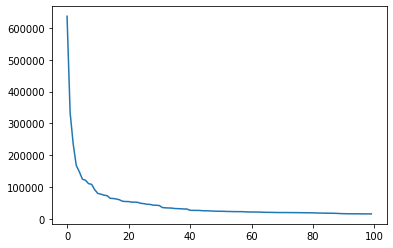

In [48]:
frequiences=[f for w,f in worlds_counter.most_common(100)]
x=[i for i in range(100)]
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,frequiences)

将y轴变为In(frequiences)

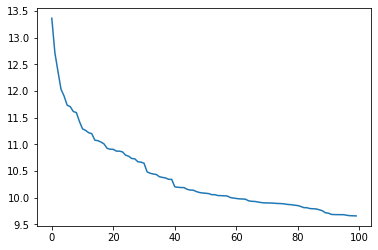

In [49]:
import numpy as np
plt.plot(x,np.log(frequiences))

计算某个切分的词出现的概率

In [54]:
print(len(TOKEN))
def prob_1(word):
    return words_counter[word] / len(TOKEN)

15869881


In [55]:
prob_1("我们")

0.0011487168681353062

In [57]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

计算两个词在一起出现的概率

In [62]:
TOKEN=[str(i) for i in TOKEN]
TOKEN_2_GRAM=[''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [72]:
words_count_2=Counter(TOKEN_2_GRAM)
type(words_count_2)

collections.Counter

In [73]:
def Prob_2(word1,word2):
    if word1+word2 in TOKEN_2_GRAM:return words_count_2[word1+word2]/len(TOKEN_2_GRAM)
    else:return 1/len(TOKEN_2_GRAM)

In [74]:
Prob_2("我们","在")

3.1317188996841125e-05

In [75]:
Prob_2("在","吃饭")

3.150622635497095e-07

In [76]:
Prob_2("去","吃饭")

1.260249054198838e-07

计算per sentence 出现的概率

In [97]:
def get_prob(sentence):
    words=cut(sentence)
    sentence_prob=1
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        prob_2=Prob_2(word,next_)
        sentence_prob *= prob_2
    return sentence_prob

In [98]:
get_prob("小明今天抽到了一台iphone")

1.341113984227968e-34

In [99]:
get_prob("明天的天气是晴天，可以出去玩")

1.093397099625878e-46

In [100]:
get_prob("小明爱喝养乐多")

3.970569196522664e-15

In [128]:
for sen in [generater_gramar_by_str(host,"=","host") for i in range(10)]:
    print("sentence: {} with prob is {}".format(sen,get_prob(sen)))


sentence: 您好我是275号,您需要null赌博吗？ with prob is 6.2558771313928855e-77
sentence: 先生,你好我是3号,请问你要null打牌吗？ with prob is 1.0329228095092299e-91
sentence: 您好我是1号,请问你要null打猎吗？ with prob is 1.1370882498934405e-77
sentence: 女士,您好我是3号,您需要null打猎吗？ with prob is 6.011133114503675e-88
sentence: 您好我是7号,您需要null打牌吗？ with prob is 6.1307595887650286e-74
sentence: 您好我是2号,您需要null喝酒吗？ with prob is 1.8917772445332082e-73
sentence: 您好我是7号,请问你要null喝酒吗？ with prob is 2.34106404389826e-78
sentence: 先生,你好我是75号,请问你要null打猎吗？ with prob is 2.5609656434113134e-94
sentence: 先生,你好我是74号,请问你要null打牌吗？ with prob is 4.26827607235219e-95
sentence: 先生,你好我是6号,请问你要null打猎吗？ with prob is 8.536552144704378e-92
